Clean Data

In [46]:
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('OnlineNewsPopularity.csv')

# Identify rows with values that are too large, too small, or NaN
mask = np.zeros(len(df), dtype=bool)
for col in df.columns:
    try:
        mask = np.logical_or(mask, (df[col].astype(float) < -1e308) | (df[col].astype(float) > 1e308))
    except ValueError:
        mask = np.logical_or(mask, df[col].astype(str).str.contains('inf|nan'))

# Drop the problematic rows
df = df.loc[~mask]

# Write the cleaned dataframe back to a csv file
df.to_csv('Cleaned_News.csv', index=False)


Import the necessary libraries and load the dataset

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Cleaned_News.csv')


Exploratory Data Analysis


<Axes: >

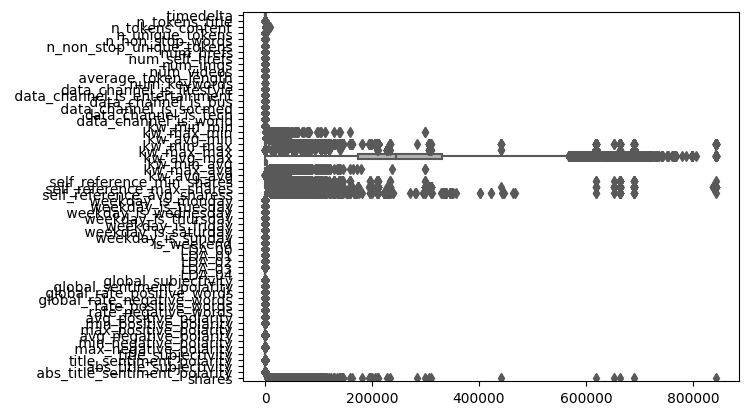

In [53]:
# Drop rows with missing values
df = df.dropna()

# Check the first 5 rows of the dataset
df.head()

# Check the shape of the dataset
df.shape

# Check the data types of the features
df.dtypes

# Check the summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

# Check for outliers
sns.boxplot(data=df, orient="h", palette="Set2")


Hypothesis Tests


In [55]:
# Test 1
from scipy import stats
df_with_lifestyle = df[df['data_channel_is_lifestyle']==1]['shares']
df_without_lifestyle = df[df['data_channel_is_lifestyle']==0]['shares']
t1, p1 = stats.ttest_ind(df_with_lifestyle, df_without_lifestyle)
print('Test 1: t = %.4f, p = %.4f' % (t1, p1))

# Test 2
df_weekend = df[df['is_weekend']==1]['shares']
df_weekday = df[df['is_weekend']==0]['shares']
t2, p2 = stats.ttest_ind(df_weekend, df_weekday)
print('Test 2: t = %.4f, p = %.4f' % (t2, p2))

# Test 3
df_polarity_pos = df[df['LDA_02']>0.5]['shares']
df_polarity_neg = df[df['LDA_02']<=0.5]['shares']
t3, p3 = stats.ttest_ind(df_polarity_pos, df_polarity_neg)
print('Test 3: t = %.4f, p = %.4f' % (t3, p3))

# Test 4
df_with_tech = df[df['data_channel_is_tech']==1]['shares']
df_without_tech = df[df['data_channel_is_tech']==0]['shares']
t4, p4 = stats.ttest_ind(df_with_tech, df_without_tech)
print('Test 4: t = %.4f, p = %.4f' % (t4, p4))

# Test 5
df_popular = df[df['shares']>1400]['n_tokens_content']
df_not_popular = df[df['shares']<=1400]['n_tokens_content']
t5, p5 = stats.ttest_ind(df_popular, df_not_popular)
print('Test 5: t = %.4f, p = %.4f' % (t5, p5))


Test 1: t = 1.1980, p = 0.2309
Test 2: t = 3.2588, p = 0.0011
Test 3: t = -10.6246, p = 0.0000
Test 4: t = -2.6022, p = 0.0093
Test 5: t = 8.0130, p = 0.0000


Ridge and Lasso Regression


In [56]:
# Split the dataset into features and target
X = df.drop(['url', 'shares'], axis=1)
y = df['shares']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Perform lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Ridge Regression:')
print('RMSE: %.4f' % rmse_ridge)
print('R-squared: %.4f' % r2_ridge)

print('Lasso Regression:')
print('RMSE: %.4f' % rmse_lasso)
print('R-squared: %.4f' % r2_lasso)


Ridge Regression:
RMSE: 10348.2788
R-squared: 0.0133
Lasso Regression:
RMSE: 10348.5001
R-squared: 0.0133


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+12, tolerance: 4.070e+08
  model = cd_fast.enet_coordinate_descent(


Scaling Methods


In [62]:
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.seterr(divide='ignore', invalid='ignore')

# Perform min-max scaling
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

# Perform log scaling
X_train_log = np.log1p(X_train + 1e-8)
X_test_log = np.log1p(X_test + 1e-8)

# Perform power transformation
power = PowerTransformer(method='yeo-johnson')
X_train_power = power.fit_transform(X_train)
X_test_power = power.transform(X_test)

# Perform standard scaling after log transformation
scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)

# Perform standard scaling after power transformation
scaler_power = StandardScaler()
X_train_power_scaled = scaler_power.fit_transform(X_train_power)
X_test_power_scaled = scaler_power.transform(X_test_power)

# Ridge regression on scaled data
ridge_minmax = Ridge(alpha=0.1)
ridge_minmax.fit(X_train_minmax, y_train)
y_pred_ridge_minmax = ridge_minmax.predict(X_test_minmax)
rmse_ridge_minmax = mean_squared_error(y_test, y_pred_ridge_minmax, squared=False)
r2_ridge_minmax = r2_score(y_test, y_pred_ridge_minmax)

# Ridge regression on log transformed data
ridge_log = Ridge(alpha=0.1)
ridge_log.fit(X_train_log_scaled, y_train)
y_pred_ridge_log = ridge_log.predict(X_test_log_scaled)
rmse_ridge_log = mean_squared_error(y_test, y_pred_ridge_log, squared=False)
r2_ridge_log = r2_score(y_test, y_pred_ridge_log)

# Ridge regression on power transformed data
ridge_power = Ridge(alpha=0.1)
ridge_power.fit(X_train_power_scaled, y_train)
y_pred_ridge_power = ridge_power.predict(X_test_power_scaled)
rmse_ridge_power = mean_squared_error(y_test, y_pred_ridge_power, squared=False)
r2_ridge_power = r2_score(y_test, y_pred_ridge_power)

print('Ridge Regression with Min-Max Scaling:')
print('RMSE: %.4f' % rmse_ridge_minmax)
print('R-squared: %.4f' % r2_ridge_minmax)

print('Ridge Regression with Log Transformation and Standard Scaling:')
print('RMSE: %.4f' % rmse_ridge_log)
print('R-squared: %.4f' % r2_ridge_log)

print('Ridge Regression with Power Transformation and Standard Scaling:')
print('RMSE: %.4f' % rmse_ridge_power)
print('R-squared: %.4f' % r2_ridge_power)


Ridge Regression with Min-Max Scaling:
RMSE: 10346.0371
R-squared: 0.0137
Ridge Regression with Log Transformation and Standard Scaling:
RMSE: 10318.9481
R-squared: 0.0189
Ridge Regression with Power Transformation and Standard Scaling:
RMSE: 10309.2116
R-squared: 0.0207


Polynomial Features


In [63]:
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge regression on polynomial features
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_poly.predict(X_test_poly)
rmse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly, squared=False)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

print('Ridge Regression with Polynomial Features:')
print('RMSE: %.4f' % rmse_ridge_poly)
print('R-squared: %.4f' % r2_ridge_poly)


Ridge Regression with Polynomial Features:
RMSE: 12138.4505
R-squared: -0.3576
